In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [360]:
#load data
df_train=pd.read_csv(r"D:\csv file\train.csv")
df_test=pd.read_csv(r"D:\csv file\test.csv")

In [361]:
df_train

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,9262754
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2544857
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,7217634


In [362]:
df_test

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,...,1.0,3.0,0,0,0,0,0,0,0,0
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,...,7.5,5.0,0,0,0,4,0,0,0,0


In [363]:
print(df_train.shape)
print(df_test.shape)

(137, 41)
(100000, 40)


In [364]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 41 columns):
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-null int64
P23           137 non-null int64
P24           137 non-null

In [365]:
df_train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715


In [366]:
df_test.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,...,1.0,3.0,0,0,0,0,0,0,0,0
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,...,5.0,3.0,0,0,0,0,0,0,0,0


In [367]:
df_train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [368]:
df_test.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [369]:
import unicodedata

In [370]:
def remove_unicode(data):
    city_name = ""
    for text in data:
        text = (text.encode("ascii", "ignore")).decode("utf-8")
        city_name += text
    return city_name

In [371]:
df_train['City']=df_train.City.apply(remove_unicode)
df_train

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,Diyarbakr,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,zmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,9262754
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2544857
135,stanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,7217634


In [372]:
df_test['City']=df_train.City.apply(remove_unicode)
df_test

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,stanbul,Other,FC,1,4.0,4.0,4.0,1,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,Ankara,Other,IL,3,4.0,4.0,4.0,2,2,5,...,1.0,3.0,0,0,0,0,0,0,0,0
2,Diyarbakr,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,Tokat,Other,IL,2,4.0,4.0,4.0,2,3,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,Gaziantep,Other,FC,2,4.0,4.0,4.0,1,2,5,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,Other,FC,5,5.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,NaN,Other,IL,1,2.0,4.0,3.0,1,1,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,NaN,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,NaN,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,...,7.5,5.0,0,0,0,4,0,0,0,0


Skewness: 2.793479


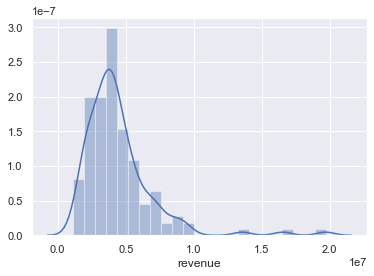

In [373]:
import seaborn as sns
sns.distplot(df_train['revenue']);
#skewness
print("Skewness: %f" % df_train['revenue'].skew())

Skewness: 0.307402


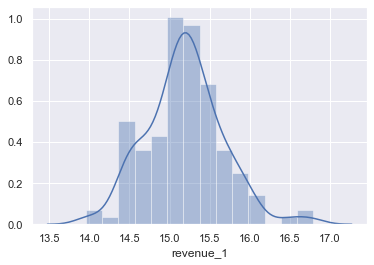

In [374]:
df_train['revenue_1'] = np.log(df_train['revenue'])

sns.distplot(df_train['revenue_1']);
# skewness and kurtosis
print("Skewness: %f" % df_train['revenue_1'].skew())

In [375]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  39
Number of Categorical features:  3


In [376]:
numerical_feats = df_test.dtypes[df_test.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_test.dtypes[df_test.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  3


In [377]:
print(df_train[numerical_feats].columns)
print(df_train[categorical_feats].columns)

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')
Index(['City', 'City Group', 'Type'], dtype='object')


In [378]:
print(df_test[numerical_feats].columns)
print(df_test[categorical_feats].columns)

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')
Index(['City', 'City Group', 'Type'], dtype='object')


In [379]:
df_train[numerical_feats].head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [380]:
df_train[categorical_feats].head()

,City,City Group,Type
0,stanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakr,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


In [381]:
df_train.isnull().sum()

City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
revenue_1     0
dtype: int64

In [382]:
df_test.isnull().sum()

City          99863
City Group        0
Type              0
P1                0
P2                0
P3                0
P4                0
P5                0
P6                0
P7                0
P8                0
P9                0
P10               0
P11               0
P12               0
P13               0
P14               0
P15               0
P16               0
P17               0
P18               0
P19               0
P20               0
P21               0
P22               0
P23               0
P24               0
P25               0
P26               0
P27               0
P28               0
P29               0
P30               0
P31               0
P32               0
P33               0
P34               0
P35               0
P36               0
P37               0
dtype: int64

ANALYSING DATA

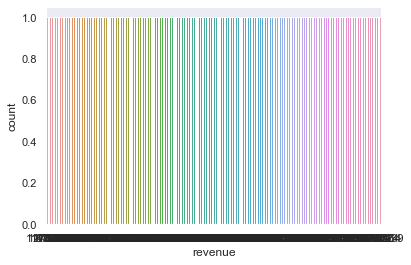

In [383]:
sns.countplot("revenue",data = df_train)

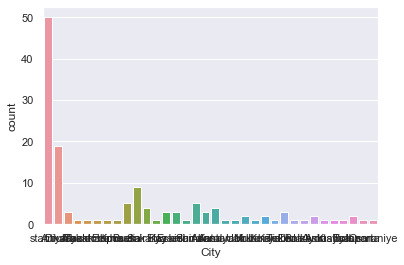

In [384]:
sns.countplot("City",data = df_train)

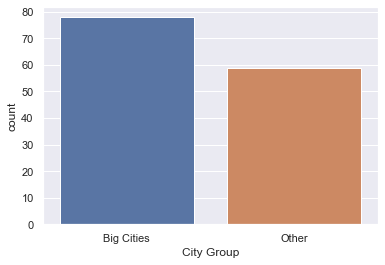

In [385]:
sns.countplot("City Group",data = df_train)

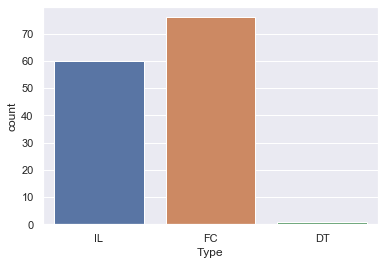

In [386]:
sns.countplot("Type",data = df_train)

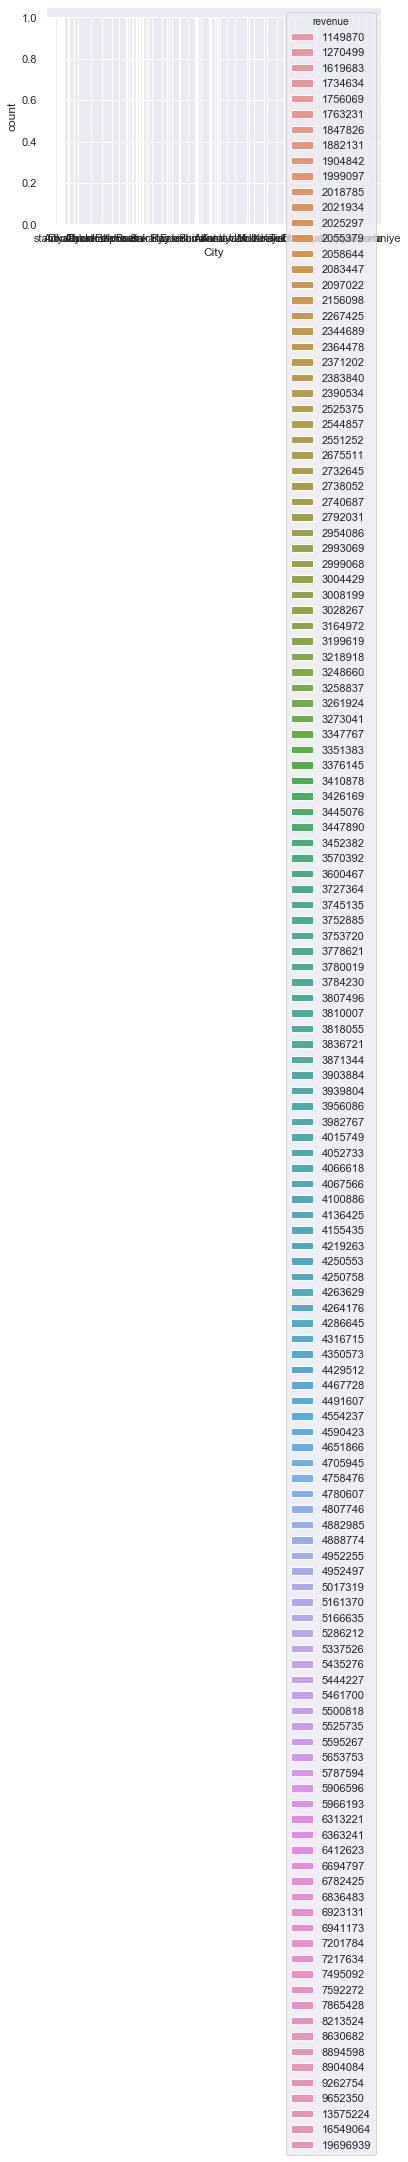

In [387]:
sns.countplot("City",hue='revenue',data = df_train)

In [329]:
df_train.rename(columns={
        'City': 'city',
        'City Group': 'city_group',
        'Type': 'type'
    }, inplace=True)

df_train.columns

Index(['city', 'city_group', 'type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'revenue_1'],
      dtype='object')

In [330]:
df_test.rename(columns={
        'City': 'city',
        'City Group': 'city_group',
        'Type': 'type'
    }, inplace=True)

df_test.columns

Index(['city', 'city_group', 'type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [331]:
city = pd.get_dummies(df_train["city"],drop_first=1)
city.head()

,Afyonkarahisar,Amasya,Ankara,Antalya,Aydn,Balkesir,Bolu,Bursa,Denizli,Diyarbakr,...,Osmaniye,Sakarya,Samsun,Tekirda,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
type= pd.get_dummies(df_train["type"],drop_first=1)
type.head()

,FC,IL
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [333]:
city_group= pd.get_dummies(df_train["city_group"],drop_first=1)
city_group.head()

,Other
0,0
1,0
2,1
3,1
4,1


In [334]:
df_train = pd.concat([df_train,city,type,city_group],axis= 1)
df_train

,city,city_group,type,P1,P2,P3,P4,P5,P6,P7,...,Tekirda,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir,FC,IL,Other
0,stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,0,0,0,0,0,1,0,0,1,0
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1,0,0
2,Diyarbakr,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,1,1
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,0,1,0,0,0,0,0,0,1,1
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,1,0,0,0,0,1,0,1
133,zmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,1,1,0,0
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,0,1,0,1
135,stanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,0,0,0,0,0,1,0,1,0,0


In [335]:
df_train.drop(["city","type","city_group"],axis=1,inplace= True)
df_train

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Tekirda,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir,FC,IL,Other
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,0,1,0,0,1,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,1,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,1,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,1,0,0,0,0,0,0,1,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,1,0,0,0,0,1,0,1
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,0,0,0,1,1,0,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,1,0,1
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,0,0,1,0,1,0,0


In [336]:
city = pd.get_dummies(df_test["city"],drop_first=1)
city.head()

,Afyonkarahisar,Amasya,Ankara,Antalya,Aydn,Balkesir,Bolu,Bursa,Denizli,Diyarbakr,...,Osmaniye,Sakarya,Samsun,Tekirda,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
type= pd.get_dummies(df_test["type"],drop_first=1)
type.head()

,FC,IL,MB
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [338]:
city_group= pd.get_dummies(df_test["city_group"],drop_first=1)
city_group.head()

,Other
0,1
1,1
2,0
3,1
4,1


In [339]:
df_test = pd.concat([df_test,city,type,city_group],axis= 1)
df_test

,city,city_group,type,P1,P2,P3,P4,P5,P6,P7,...,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir,FC,IL,MB,Other
0,stanbul,Other,FC,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,1,0,1,0,0,1
1,Ankara,Other,IL,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,1,0,1
2,Diyarbakr,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,1,0,0,0
3,Tokat,Other,IL,2,4.0,4.0,4.0,2,3,5,...,1,0,0,0,0,0,0,1,0,1
4,Gaziantep,Other,FC,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,Other,FC,5,5.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,1,0,0,1
99996,NaN,Other,IL,1,2.0,4.0,3.0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
99997,NaN,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1,0,0
99998,NaN,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,...,0,0,0,0,0,0,1,0,0,0


In [340]:
df_test.drop(["city","type","city_group"],axis=1,inplace= True)
df_test

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Tokat,Trabzon,Uak,anlurfa,stanbul,zmir,FC,IL,MB,Other
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,1,0,1,0,0,1
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,0,0,0,1,0,1
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0,0,1,0,0,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,1,0,0,0,0,0,0,1,0,1
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,...,0,0,0,0,0,0,1,0,0,1
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,...,0,0,0,0,0,0,0,1,0,1
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,...,0,0,0,0,0,0,0,1,0,0
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,...,0,0,0,0,0,0,1,0,0,0


In [341]:
# real_x=df_train.iloc[:,:-1].values
# real_y=df_train.iloc[:,-1:].values

In [342]:
train_x =  df_train.drop(["revenue"],axis = 1).values
train_y = df_train["revenue"].values

In [343]:
print(train_x)
print(train_y)

[[4. 5. 4. ... 0. 1. 0.]
 [4. 5. 4. ... 1. 0. 0.]
 [2. 4. 2. ... 0. 1. 1.]
 ...
 [3. 4. 4. ... 1. 0. 1.]
 [4. 5. 4. ... 1. 0. 0.]
 [4. 5. 3. ... 1. 0. 0.]]
[ 5653753  6923131  2055379  2675511  4316715  5017319  5166635  4491607
  4952497  5444227  3745135  5161370  1734634  4807746  1999097  3218918
 19696939  8213524  5337526  2021934  5525735  1149870  3956086  2999068
  8904084  3778621  2267425  5435276  4705945  3447890  3008199  2058644
  3261924  2371202  4100886  3903884  3028267  2740687  5461700  3818055
  6836483  4554237  4952255  2732645  4264176  3752885  4250758  7865428
  7201784  8630682  2156098  3273041  1763231  5595267  4651866  6941173
  2390534  3258837  3004429  3600467  3164972  4350573  5286212  1619683
  2551252  1756069  1882131  4052733  3836721  3452382  3982767  4136425
  2525375  3347767  5500818 16549064  4590423  1904842  3871344  6313221
  3727364  4066618  3807496  5966193  4250553  7495092  3351383  5906596
  2025297  2364478  3426169  2083447  678

In [348]:
x_test=df_test.iloc[:,:].values

In [349]:
x_test

array([[ 1. ,  4. ,  4. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  4. ,  4. , ...,  1. ,  0. ,  1. ],
       [ 3. ,  4. ,  4. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 4. ,  5. ,  4. , ...,  1. ,  0. ,  0. ],
       [12. ,  7.5,  6. , ...,  0. ,  0. ,  0. ],
       [ 2. ,  5. ,  4. , ...,  1. ,  0. ,  0. ]])

In [350]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [353]:
y_pred

array([-73181881.9621505 , -74405815.67786528, -74237404.2331098 , ...,
       -73688721.06233133, -75836721.05066194, -74613450.67138745])

In [354]:
train_y

array([ 5653753,  6923131,  2055379,  2675511,  4316715,  5017319,
        5166635,  4491607,  4952497,  5444227,  3745135,  5161370,
        1734634,  4807746,  1999097,  3218918, 19696939,  8213524,
        5337526,  2021934,  5525735,  1149870,  3956086,  2999068,
        8904084,  3778621,  2267425,  5435276,  4705945,  3447890,
        3008199,  2058644,  3261924,  2371202,  4100886,  3903884,
        3028267,  2740687,  5461700,  3818055,  6836483,  4554237,
        4952255,  2732645,  4264176,  3752885,  4250758,  7865428,
        7201784,  8630682,  2156098,  3273041,  1763231,  5595267,
        4651866,  6941173,  2390534,  3258837,  3004429,  3600467,
        3164972,  4350573,  5286212,  1619683,  2551252,  1756069,
        1882131,  4052733,  3836721,  3452382,  3982767,  4136425,
        2525375,  3347767,  5500818, 16549064,  4590423,  1904842,
        3871344,  6313221,  3727364,  4066618,  3807496,  5966193,
        4250553,  7495092,  3351383,  5906596,  2025297,  2364

In [355]:
regressor.coef_

array([ 1.39132325e+05,  7.62151242e+03, -1.90334765e+05,  1.11231444e+05,
       -3.41254360e+05,  2.30117803e+05, -1.03835888e+05, -1.77897402e+05,
        7.99250765e+05,  3.18752328e+05,  8.80401464e+04, -2.49959271e+05,
       -8.29144699e+05, -8.52197099e+04, -2.54972346e+04, -2.00940410e+05,
       -9.88187016e+04, -1.26633981e+05,  3.60808082e+04, -4.97767817e+04,
        1.47764152e+05, -1.21110184e+05, -3.13859448e+04, -1.13618871e+03,
       -7.17923886e+04,  1.38170665e+04, -1.05706736e+04, -2.70011185e+05,
       -4.04314698e+05, -4.44840851e+03, -5.86921884e+04, -7.22278603e+04,
       -2.49544142e+05, -5.21022456e+04,  1.61141382e+05,  4.90027254e+05,
        7.61848948e+04,  5.14833599e+06, -1.03696761e+06, -1.99919282e+05,
       -4.67250624e+04, -1.47348182e+05, -2.81482731e+05,  3.43377866e+05,
       -6.25733875e+05,  6.12950349e+05,  6.93313203e+05, -4.49115938e+05,
       -1.07872695e+06, -8.83584266e+05, -3.31644020e+05, -7.39693878e+05,
        6.27962839e+05, -

In [356]:
regressor.intercept_

-71991663.38410777